# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

df = pd.read_csv('kc_house_data_train.csv')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [2]:
df.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000e+00,-0.006139,-0.012306,-0.010271,-0.004940,-0.008900,-0.003500,0.010599,-0.008845,-6.278161e-07,-0.001781,-0.005015,-0.003406,-0.012104,0.007496,-0.003423,0.006218,0.002470,-0.006992,-0.008961,0.000463
id,-6.138777e-03,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,1.259374e-02,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-1.230630e-02,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,3.954851e-01,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-1.027127e-02,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,7.974076e-02,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,-4.939574e-03,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,1.888170e-01,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-8.900440e-03,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,2.833358e-01,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-3.500101e-03,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,7.305841e-02,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,1.059874e-02,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,2.588299e-02,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,-8.844970e-03,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,4.075653e-01,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,-6.278161e-07,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000e+00,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185


In [3]:
stuff=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
stuff['pairs'] = list(zip(stuff.level_0, stuff.level_1))
stuff.set_index(['pairs'], inplace = True)
stuff.drop(columns=['level_1', 'level_0'], inplace = True)
stuff.columns = ['cc']
stuff.drop_duplicates(inplace=True)
stuff[(stuff.cc>.7) & (stuff.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(grade, sqft_living)",0.762929
"(grade, sqft_above)",0.758247
"(bathrooms, sqft_living)",0.755270
"(sqft_living15, sqft_living)",0.755066
"(sqft_above, sqft_living15)",0.731077
"(grade, sqft_living15)",0.715745
"(sqft_living, price)",0.703540
"(sqft_lot, sqft_lot15)",0.701875


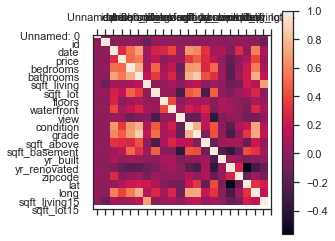

In [4]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [5]:
df['price'] = df['price'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['date','id','sqft_above','yr_renovated','zipcode','sqft_living15','sqft_lot15','floors','sqft_lot'], inplace=True)
df.bedrooms.value_counts()
df = df[df.bedrooms <33]
df=((df-df.min())/(df.max()-df.min()))*20


In [6]:
df = df[df.price > 0]
df['price_log']= np.log(df['price'])

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

In [7]:
subset = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition',
       'sqft_living','grade', 'sqft_basement', 'yr_built', 'lat', 'long']
df_features = df[subset]
target = df['price']

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_3 = PolynomialFeatures(degree=3, include_bias = False)

poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
lm_3 = LinearRegression()
lm_3 = lm_3.fit(df_poly3, target)

print('R^2:', lm_3.score(df_poly3, target))

R^2: 0.8555526481728455


## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)

print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)

Training set - Features: (13830, 363) Target: (13830,)
Training set - Features: (3458, 363) Target: (3458,)


In [10]:
lm3 = LinearRegression()
lm3 = lm3.fit(X_train, y_train)
y_train_pred = lm3.predict(X_train)

In [11]:
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.23303986248629482
Mean Squared Error: 0.13326048545657146
Root Mean Squared Error: 0.36504860697799063


In [12]:
y_test_pred = lm3.predict(X_test)

In [13]:

mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.25359262847894376
Mean Squared Error: 0.208114148591003
Root Mean Squared Error: 0.4561952965463399


In [14]:
print('R^2 for training data:', lm_3.score(X_train, y_train))
print('R^2 for testing data:', lm_3.score(X_test, y_test))

R^2 for training data: 0.8509683535844165
R^2 for testing data: 0.8701325401152756


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

# Linear regression

In [15]:
lm = LinearRegression()
lm = lm.fit(df_features,target)
print(lm.intercept_)
print(lm.coef_)
print('R^2', lm.score(df_features, target))

-1.6034482935567096
[-0.05526465  0.04679634  0.07841163  0.02676145  0.01486202  0.34291548
  0.15987172 -0.02319005 -0.0395532   0.0458552  -0.01744427]
R^2 0.6934087993690572


# Polynomial power of 2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias = False)

poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns = poly_columns)
lm_2 = LinearRegression()
lm_2 = lm_2.fit(df_poly, target)

print('R^2:', lm_2.score(df_poly, target))

R^2: 0.7972125217848975


# Lasso Model


In [17]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=True)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 0.6125786592315929
Testing Error: 1.0701028677956343


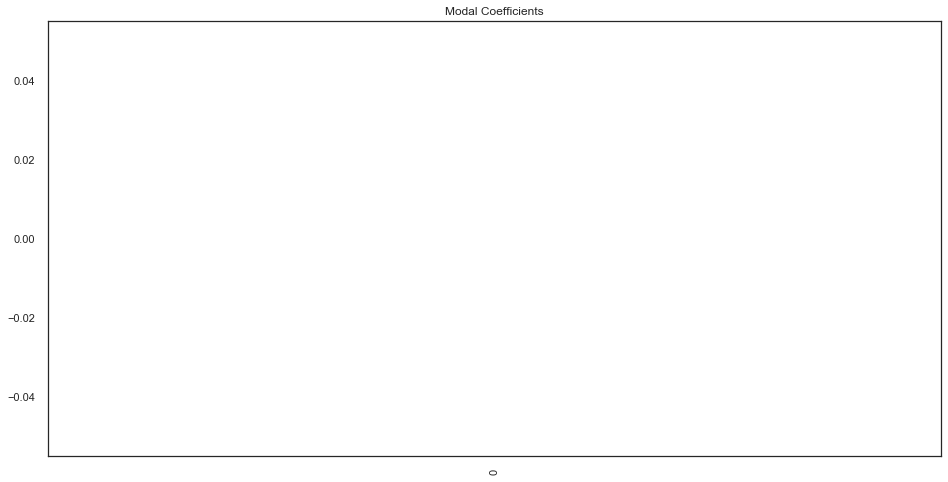

In [18]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [32]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )

Training Error: 0.2521843078001864
Testing Error: 0.4513089420223252


## Step 7: Evaluate your different models in order to determine the best model overall

We found the third degree polynomial to be the most helpful in terms of lowest testing MSE and highest testing R^2.

## Step 8:  Refit your best model to the entire dataset

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_3 = PolynomialFeatures(degree=3, include_bias = False)

poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
lm_3 = LinearRegression()
lm_3 = lm_3.fit(df_poly3, target)

print('R^2:', lm_3.score(df_poly3, target))

R^2: 0.8555526481728455


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)

print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)

Training set - Features: (13830, 363) Target: (13830,)
Training set - Features: (3458, 363) Target: (3458,)


In [39]:
lm3 = LinearRegression()
lm3 = lm3.fit(X_train, y_train)
y_train_pred = lm3.predict(X_train)

In [40]:
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.23303986248629482
Mean Squared Error: 0.13326048545657146
Root Mean Squared Error: 0.36504860697799063


In [41]:
y_test_pred = lm3.predict(X_test)

In [42]:

mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.25359262847894376
Mean Squared Error: 0.208114148591003
Root Mean Squared Error: 0.4561952965463399


In [43]:
print('R^2 for training data:', lm_3.score(X_train, y_train))
print('R^2 for testing data:', lm_3.score(X_test, y_test))

R^2 for training data: 0.8509683535844165
R^2 for testing data: 0.8701325401152756


In [ ]:
lm3

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [46]:
lm_3 = lm_3.fit(X_train,y_train)
filename = 'finalized_model.sav'


In [47]:
filename = 'finalized_model.sav'
pickle.dump(lm_3, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train,y_train)
print(result)

0.8539160515248546


In [48]:
df=((df-df.min())/(df.max()-df.min()))*20
filename = 'finalized_model.sav'